In [78]:
import numpy as np
import matplotlib.pyplot as plt
from random import randrange

### Zadanie 1 Faktoryzacja QR metodą Grama-Schmidta
1. Napisz funkcję dokonującą faktoryzacji QR macierzy $A ∈ R^{n×n}$ , $A = [a_1,a_2, . . . ,a_n]$ klasyczną metodą ortogonalizacji Grama-Schmidta

##### Wzory:

Dla $k=1$:  
$u_1\leftarrow \frac{a_1}{\Arrowvert a_1 \Arrowvert}$

Dla $k>1$:  
$u_k\leftarrow a_k - \sum_{i=1}^{k-1}\langle u_i,a_k\rangle u_i$  
$u_k\leftarrow \frac{u_k}{\Arrowvert u_k \Arrowvert}$  
  
$Q = [u_1,u_2,...,u_n]$  
  
$R = \begin{bmatrix} \langle u_1,a_1\rangle & \langle u_1,a_2\rangle & \langle u_1,a_3\rangle & \cdots \\
                0 & \langle u_2,a_2\rangle & \langle u_2,a_3\rangle & \cdots \\
                0 & 0 & \langle u_3,a_3\rangle & \cdots \\
                \vdots & \vdots & \vdots & \ddots \end{bmatrix}$

In [37]:
def QR(A):
    n = A.shape[0]
    Q = np.zeros((n,n))
    R = np.zeros((n,n))
    
    for k in range (n):
        Q[:,k] = A[:,k]        
        for i in range (k): #dla k=0 nie wejdziemy do wewnętrznej pętli więc jest ok
            Q[:,k] -= (Q[:,i] @ A[:,k]) * Q[:,i]
        Q[:,k] /= np.linalg.norm(Q[:,k])
        for j in range (k,n):
            R[k,j] = Q[:,k]@A[:,j]
            
    return Q,R

2. Przetestuj zaimplementowaną metodę porównując wyniki uzyskane z jej pomocą z wynikami zwracanymi przez funkcję biblioteczną. W testach wykorzystaj 4-5 macierzy losowych o różnym rozmiarze.

In [59]:
for n in range (50,251,50):
    A = np.random.rand(n, n)
    Q1,R1 = np.linalg.qr(np.copy(A))
    Q2,R2 = QR(np.copy(A))
    
    if (np.allclose(Q1,Q2) and np.allclose(R1,R2)):
        print("Your QR works exactly as numpy!")
    if (np.allclose(np.absolute(Q1),np.absolute(Q2)) and np.allclose(np.absolute(R1),np.absolute(R2))):
        if(np.allclose(Q2@R2,A)):
            print("Your QR works alright")
        else:
            print("Well yeah but no")
    else:
        print("We've got a big no no here")

Your QR works alright
Your QR works alright
Your QR works alright
Your QR works alright
Your QR works alright


3. Wygeneruj 30-50 przykładowych macierzy 8×8 o różnym wskaźniku uwarunkowania (stosunek największej do najmniejszej wartości osobliwej). Wykorzystaj w tym celu SVD oraz biblioteczną funkcję realizującą dekompozycję QR (potrzebne będą dwie losowe macierze ortogonalne oraz diagonalna macierz odpowiednio szybko malejących wartości osobliwych).

$cond = \frac {s_1}{s_n}$

In [138]:
M = np.random.rand(8,8)
As = []
for i in range(40):
    U,S,V = np.linalg.svd(M)
    S[0] *= 1.8
    S = np.diag(S) #żeby to mnożenie poniżej działało
    M = U @ S @ V
    As.append(M)

4. Dla każdej z uzyskanych w ten sposób macierzy $A_i$ wyznacz faktoryzację QR korzystając z zaimplementowanej funkcji $(A_i = Q_iR_i)$. Przedstaw zależność  $\Arrowvert I−Q^T_i Q_i\Arrowvert$ od $cond(A_i)$.

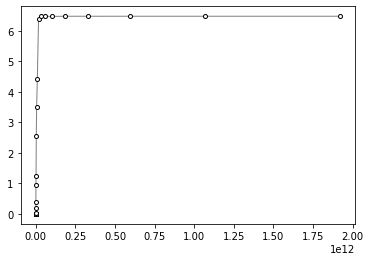

In [180]:
conds = []
norms = []
for A in As:
    Q,_ = QR(np.copy(A))
    _,S,_ = np.linalg.svd(A)
    norms.append(np.linalg.norm(np.identity(n)-Q.T@Q))
    conds.append(S[0]/S[n-1])
    
plt.plot(conds,norms, '-o', color='gray',
         markersize=4, linewidth=1,
         markerfacecolor='white',
         markeredgecolor='black',
         markeredgewidth=1)
plt.show()

5. Zinterpretuj wyniki. Jaka jest przyczyna uzyskanych rozbieżności? Od czego zależy wielkość rozbieżności? 

Na wykresie widzimy że im bardziej zwiększa się wartość wskaźnika uwarunkowania tym większa jest wartość $\Arrowvert I−Q^T_i Q_i\Arrowvert$.  
Przyczyną uzyskanych rozbieżności jest brak stabilności numerycznej zaimplementowanego algorytmu QR. Wraz ze wzrostem wartości wskaźnika uwarunkowania macierzy warunek (macierzy ortagonalnych) $A^TA=I$ przestaje być prawdziwy.

### Zadanie 2 Rozwiązywanie układów równań metodą QR
Napisz funkcję rozwiązującą nadokreślony układ równań liniowych metodą QR. Następnie wykorzystaj ją do rozwiązania problemu proksymacji średniokwadratowej dla zbioru punktów podanego tabeli poniżej. Przyjmij model postaci:   
  
$f(x) = α_0 + α_1x + α_2x^2$ 
  
Przedstaw wizualizację uzyskanego wyniku (punkty oraz funkcja aproksymująca f)

In [175]:
X = [i for i in range (-5,6)]
Y = [2,7,9,12,13,14,14,13,10,8,4]
A = np.array([[1,x,x**2] for x in X])

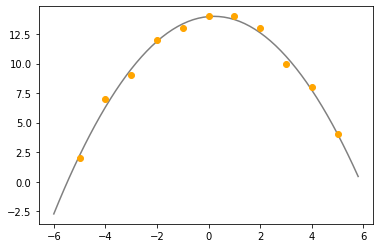

In [178]:
def solveLeastSquares(A,y):
    Q,R = np.linalg.qr(A)
    return np.linalg.solve(R,Q.T@y)

a = leastSquares(A,Y)
domain = np.arange(min(X)-1,max(X)+1,0.2)
values = [a[0] + x*a[1] + x**2 * a[2] for x in domain]

plt.plot(domain,values,color='gray')
plt.plot(X,Y,'o',color='orange')
plt.show()